# 필요 라이브러리 코드

In [29]:
from matplotlib import font_manager, rc
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [30]:
# 폰트 설정
rc('font', family = 'AppleGothic')

# 그래프에서 마이너스 기호가 표시되게 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

# 프리시즌 데이터 분석
- 시즌 개막 전 6주동안 프리시즌을 치름
- 팀별로 5개 팀과 2차전까지 10경기를 치르며 총 50경기 진행함

In [31]:
# 프리시즌 데이터 로드
preseason_df = pd.read_csv('Pre_Season_Batter.csv')

# 정규 시즌 데이터 로드
regular_season_df = pd.read_csv('Regular_Season_Batter.csv')

In [32]:
# 데이터 크기 파악 (1329, 29)
print(preseason_df.shape) 

# 데이터 출력, 열이 많을 때도 표로 예쁘게 출력되는 모듈
display(preseason_df.head()) 

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [33]:
pd.set_option('display.max_columns',None) # 모든 열 보기 
pd.set_option('display.max_rows', None) # 모든 행 보기

In [34]:
# 데이터의 기초통계량 확인 - 결측치 확인, 연도 최소 최대 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,2.430725,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,2.698122,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,24.000000,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


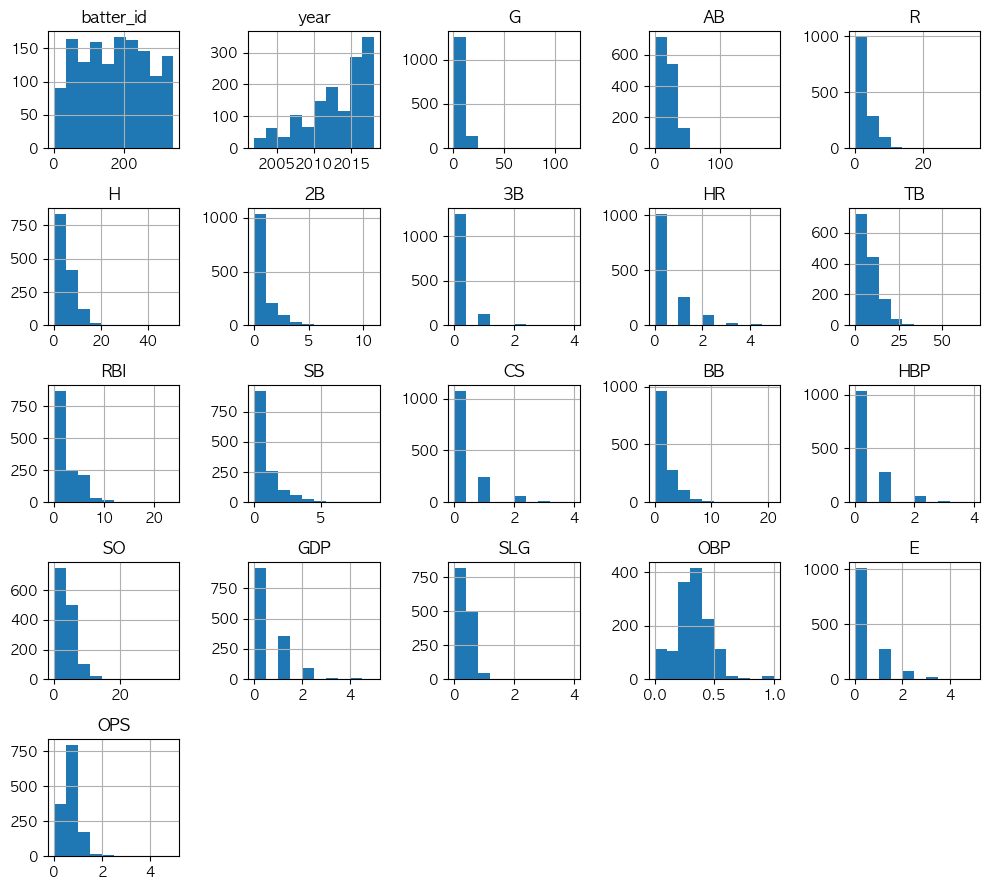

In [35]:
# 데이터 시각화, 수치형 변수 Histogram으로 분포 보기
preseason_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간의 간격 늘려주어서 글자들이 보이게
plt.show()

In [50]:
# 정규 시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year').count().iloc[:,0].rename('regular')

# 프리 시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year').count().iloc[:,0].rename('preseason')

pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count, 2).rename('ratio')],axis=1).transpose().loc[:,2002:] # 2002년부터 본다

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [56]:
# 타자의 이름과 연도를 이용해 새로운 인덱스 생성
regular_season_df['new_idx'] = regular_season_df['batter_name']+ regular_season_df['year'].apply(str) # str 값으로 형변환
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

# 새로운 idx의 교집합
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))

# 교집합에 존재하는 데이터만 불러오고 인덱스 정렬
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x : x in intersection_idx)].copy() 
regular_season_new = regular_season_new.sort_values(by='new_idx').reset_index(drop=True)

preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x : x in intersection_idx)].copy() 
preseason_new = preseason_new.sort_values(by='new_idx').reset_index(drop=True)

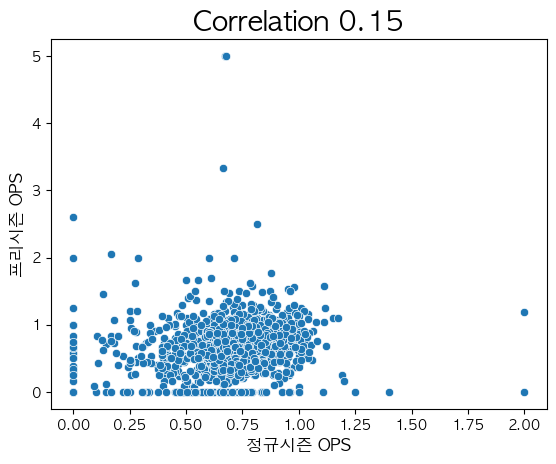

In [73]:
# 정규 시즌과 프리 시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(x=regular_season_new['OPS'], y=preseason_new['OPS'])
plt.title('Correlation' +' ' + str(np.round(correlation, 2)), fontsize = 20)
plt.xlabel('정규시즌 OPS', fontsize = 12)
plt.ylabel('프리시즌 OPS', fontsize = 12)
plt.show()